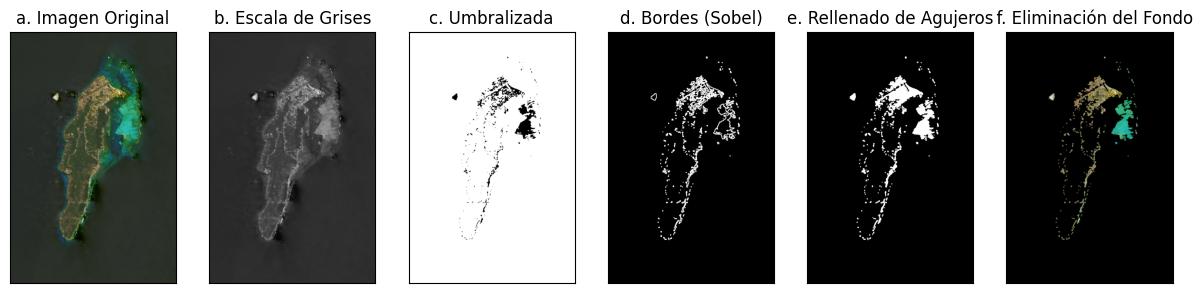

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def arrecife_isla(ruta):

  # Cargar la imagen
  img = cv2.imread(ruta)

  # Convertir a escala de grises
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Umbralización
  _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

  # Detección de bordes (Sobel)
  sobelx = cv2.Sobel(thresh, cv2.CV_64F, 1, 0, ksize=5)
  sobely = cv2.Sobel(thresh, cv2.CV_64F, 0, 1, ksize=5)
  sobel = cv2.sqrt(sobelx**2 + sobely**2)
  sobel = cv2.convertScaleAbs(sobel)

  # Rellenado de agujeros
  rellenado = np.copy(sobel)
  contours, _ = cv2.findContours(sobel, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
      cv2.drawContours(rellenado, [cnt], 0, 255, -1)

  # Eliminación del fondo
  masked_img = cv2.bitwise_and(img, img, mask=rellenado)

  # Mostrar resultados
  titles = ['a. Imagen Original', 'b. Escala de Grises', 'c. Umbralizada', 'd. Bordes (Sobel)', 'e. Rellenado de Agujeros', '  f. Eliminación del Fondo']
  images = [img, gray, thresh, sobel, rellenado, masked_img]

  plt.figure(figsize=(15, 10))
  for i in range(6):
      plt.subplot(1, 6, i+1)
      if i == 0 or i == 5:
          plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
      else:
          plt.imshow(images[i], 'gray' if i not in [0, 5] else None)

      plt.title(titles[i])
      plt.xticks([]), plt.yticks([])

  plt.show()

arrecife_isla('sai_3.png')




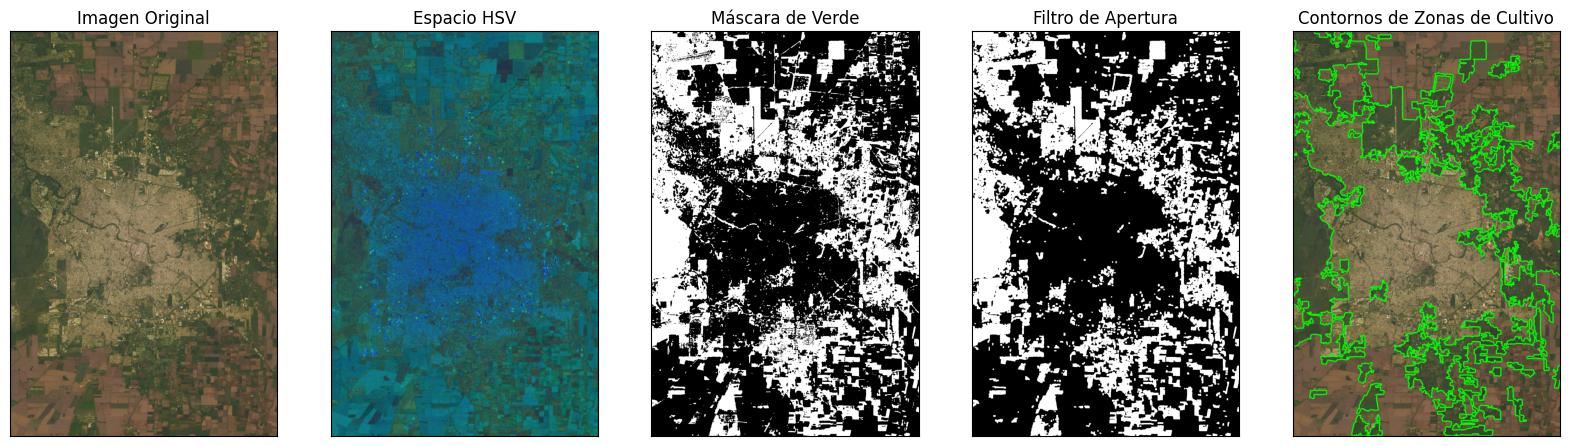

In [50]:
def detectar_zonas_verdes(ruta):
    # Cargar la imagen
    img = cv2.imread(ruta)

    # Convertir a espacio de color HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Segmentación por color (ajustar umbrales)
    lower_green = np.array([30, 40, 40])
    upper_green = np.array([85, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Filtros morfológicos
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Detección de contornos
    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Copia de la imagen original para dibujar contornos
    img_contours = img.copy()
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 1000:  # Ajustar el tamaño mínimo
            cv2.drawContours(img_contours, [cnt], -1, (0, 255, 0), 3)

    # Mostrar resultados paso a paso
    titles = ['Imagen Original', 'Espacio HSV', 'Máscara de Verde',
              'Filtro de Apertura', 'Contornos de Zonas de Cultivo']
    images = [img, hsv, mask, opening, img_contours]

    plt.figure(figsize=(20, 10))
    for i in range(len(images)):
        plt.subplot(1, 5, i+1)
        if i == 0 or i == 4:
          plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
          plt.imshow(images[i], cmap='gray' if i > 1 else None)
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()



detectar_zonas_verdes('cordoba.png')

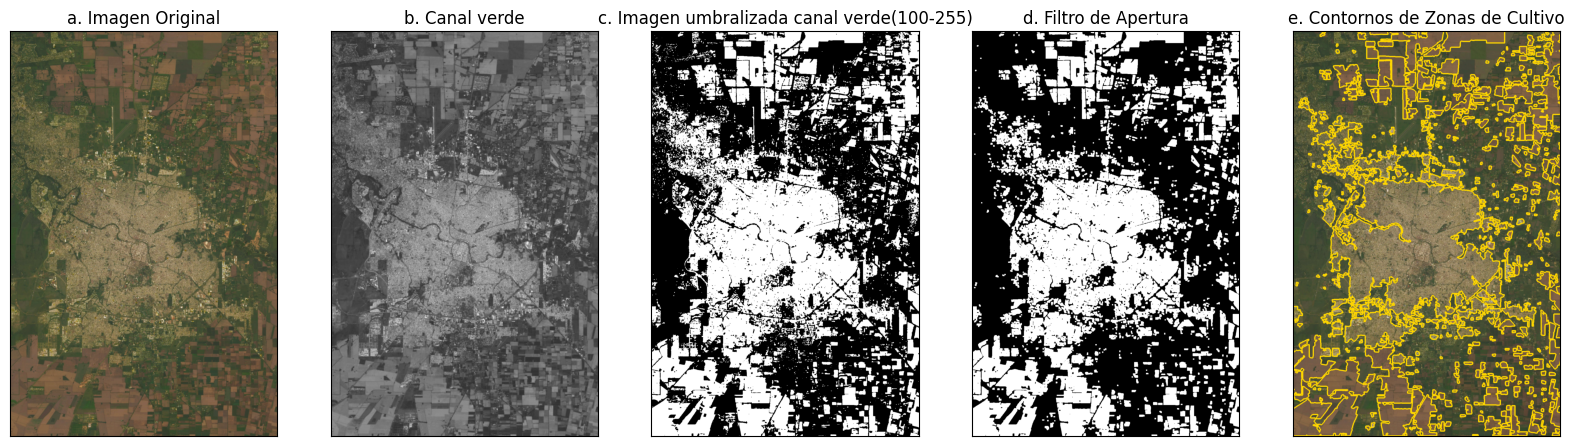

In [58]:


def detectar_zonas_cafes(ruta):

    img = cv2.imread(ruta)


    green_channel = img[:, :, 2]


    lower_green = 100
    upper_green = 255
    mask = cv2.inRange(green_channel, lower_green, upper_green)


    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)


    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    img_contours = img.copy()
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:  # Ajustar el tamaño mínimo
            cv2.drawContours(img_contours, [cnt], -1, (0, 215, 255), 3)


    # Mostrar resultados paso a paso
    titles = ['a. Imagen Original', 'b. Canal verde', 'c. Imagen umbralizada canal verde(100-255)',
              'd. Filtro de Apertura', 'e. Contornos de Zonas de Cultivo']
    images = [img, green_channel, mask, opening, img_contours]

    plt.figure(figsize=(20, 10))
    for i in range(len(images)):
        plt.subplot(1, 5, i+1)
        if i == 0 or i == 4:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()

# Llama a la función con la ruta de tu imagen
detectar_zonas_cafes('cordoba.png')